## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9606716	total: 58.9ms	remaining: 29.4s
2:	learn: 0.9390920	total: 59.9ms	remaining: 19.9s
3:	learn: 0.9209237	total: 61.1ms	remaining: 15.2s
4:	learn: 0.9046978	total: 62.2ms	remaining: 12.4s
5:	learn: 0.8896854	total: 63.2ms	remaining: 10.5s
6:	learn: 0.8724151	total: 64.1ms	remaining: 9.09s
7:	learn: 0.8558633	total: 64.9ms	remaining: 8.04s
8:	learn: 0.8400199	total: 65.8ms	remaining: 7.25s
9:	learn: 0.8229065	total: 66.7ms	remaining: 6.6s
10:	learn: 0.8057776	total: 67.6ms	remaining: 6.08s
11:	learn: 0.7907426	total: 68.5ms	remaining: 5.64s
12:	learn: 0.7753485	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7601130	total: 70.4ms	remaining: 4.96s
14:	learn: 0.7475256	total: 71.3ms	remaining: 4.68s
15:	learn: 0.7326054	total: 72.1ms	remaining: 4.43s
16:	learn: 0.7206853	total: 72.9ms	remaining: 4.22s
17:	learn: 0.7077303	total: 74ms	remaining: 4.04s
18:	learn: 0.6955287	total: 74.8ms	remaining: 3

104:	learn: 0.3013455	total: 148ms	remaining: 1.26s
105:	learn: 0.2996238	total: 149ms	remaining: 1.25s
106:	learn: 0.2980370	total: 149ms	remaining: 1.25s
107:	learn: 0.2965967	total: 150ms	remaining: 1.24s
108:	learn: 0.2951864	total: 151ms	remaining: 1.23s
109:	learn: 0.2942861	total: 152ms	remaining: 1.23s
110:	learn: 0.2932928	total: 153ms	remaining: 1.22s
111:	learn: 0.2916150	total: 154ms	remaining: 1.22s
112:	learn: 0.2903158	total: 155ms	remaining: 1.21s
113:	learn: 0.2893044	total: 155ms	remaining: 1.21s
114:	learn: 0.2880453	total: 156ms	remaining: 1.2s
115:	learn: 0.2868924	total: 157ms	remaining: 1.2s
116:	learn: 0.2854905	total: 158ms	remaining: 1.19s
117:	learn: 0.2838426	total: 159ms	remaining: 1.19s
118:	learn: 0.2827228	total: 160ms	remaining: 1.18s
119:	learn: 0.2820207	total: 161ms	remaining: 1.18s
120:	learn: 0.2807575	total: 161ms	remaining: 1.17s
121:	learn: 0.2800950	total: 162ms	remaining: 1.17s
122:	learn: 0.2793606	total: 163ms	remaining: 1.16s
123:	learn: 0.

156:	learn: 0.2484356	total: 192ms	remaining: 1.03s
157:	learn: 0.2475208	total: 193ms	remaining: 1.03s
158:	learn: 0.2467460	total: 194ms	remaining: 1.02s
159:	learn: 0.2461317	total: 195ms	remaining: 1.02s
160:	learn: 0.2456028	total: 195ms	remaining: 1.02s
161:	learn: 0.2449256	total: 196ms	remaining: 1.01s
162:	learn: 0.2444113	total: 197ms	remaining: 1.01s
163:	learn: 0.2438126	total: 198ms	remaining: 1.01s
164:	learn: 0.2432080	total: 199ms	remaining: 1s
165:	learn: 0.2425986	total: 200ms	remaining: 1s
166:	learn: 0.2421108	total: 200ms	remaining: 999ms
167:	learn: 0.2413956	total: 201ms	remaining: 996ms
168:	learn: 0.2407630	total: 202ms	remaining: 993ms
169:	learn: 0.2401529	total: 203ms	remaining: 991ms
170:	learn: 0.2391465	total: 204ms	remaining: 988ms
171:	learn: 0.2383087	total: 205ms	remaining: 986ms
172:	learn: 0.2377594	total: 206ms	remaining: 983ms
173:	learn: 0.2373192	total: 207ms	remaining: 981ms
174:	learn: 0.2367045	total: 207ms	remaining: 977ms
175:	learn: 0.2361

310:	learn: 0.1738419	total: 337ms	remaining: 746ms
311:	learn: 0.1734089	total: 338ms	remaining: 745ms
312:	learn: 0.1731178	total: 339ms	remaining: 743ms
313:	learn: 0.1727077	total: 339ms	remaining: 741ms
314:	learn: 0.1723778	total: 341ms	remaining: 740ms
315:	learn: 0.1720145	total: 341ms	remaining: 739ms
316:	learn: 0.1715627	total: 342ms	remaining: 737ms
317:	learn: 0.1714053	total: 343ms	remaining: 735ms
318:	learn: 0.1709797	total: 344ms	remaining: 734ms
319:	learn: 0.1706233	total: 345ms	remaining: 732ms
320:	learn: 0.1703284	total: 345ms	remaining: 730ms
321:	learn: 0.1700544	total: 346ms	remaining: 729ms
322:	learn: 0.1696955	total: 347ms	remaining: 727ms
323:	learn: 0.1695203	total: 348ms	remaining: 725ms
324:	learn: 0.1693707	total: 349ms	remaining: 724ms
325:	learn: 0.1690932	total: 349ms	remaining: 722ms
326:	learn: 0.1687871	total: 350ms	remaining: 720ms
327:	learn: 0.1684932	total: 351ms	remaining: 718ms
328:	learn: 0.1680740	total: 351ms	remaining: 716ms
329:	learn: 

342:	learn: 0.1637969	total: 389ms	remaining: 745ms
343:	learn: 0.1634989	total: 390ms	remaining: 744ms
344:	learn: 0.1631288	total: 392ms	remaining: 744ms
345:	learn: 0.1630031	total: 394ms	remaining: 744ms
346:	learn: 0.1625470	total: 395ms	remaining: 744ms
347:	learn: 0.1622545	total: 397ms	remaining: 743ms
348:	learn: 0.1619905	total: 398ms	remaining: 742ms
349:	learn: 0.1619095	total: 399ms	remaining: 741ms
350:	learn: 0.1616910	total: 410ms	remaining: 758ms
351:	learn: 0.1613933	total: 411ms	remaining: 757ms
352:	learn: 0.1611181	total: 413ms	remaining: 757ms
353:	learn: 0.1607851	total: 414ms	remaining: 756ms
354:	learn: 0.1604549	total: 416ms	remaining: 756ms
355:	learn: 0.1601748	total: 427ms	remaining: 773ms
356:	learn: 0.1600802	total: 439ms	remaining: 791ms
357:	learn: 0.1598210	total: 442ms	remaining: 792ms
358:	learn: 0.1595903	total: 444ms	remaining: 793ms
359:	learn: 0.1593606	total: 446ms	remaining: 792ms
360:	learn: 0.1590600	total: 447ms	remaining: 792ms
361:	learn: 

404:	learn: 0.1477147	total: 529ms	remaining: 777ms
405:	learn: 0.1474734	total: 530ms	remaining: 775ms
406:	learn: 0.1472228	total: 531ms	remaining: 773ms
407:	learn: 0.1469746	total: 532ms	remaining: 773ms
408:	learn: 0.1468940	total: 533ms	remaining: 771ms
409:	learn: 0.1468005	total: 534ms	remaining: 769ms
410:	learn: 0.1465537	total: 535ms	remaining: 767ms
411:	learn: 0.1463988	total: 536ms	remaining: 765ms
412:	learn: 0.1461665	total: 537ms	remaining: 763ms
413:	learn: 0.1460520	total: 538ms	remaining: 762ms
414:	learn: 0.1458079	total: 539ms	remaining: 760ms
415:	learn: 0.1454856	total: 540ms	remaining: 758ms
416:	learn: 0.1452920	total: 541ms	remaining: 757ms
417:	learn: 0.1450629	total: 542ms	remaining: 755ms
418:	learn: 0.1448614	total: 543ms	remaining: 753ms
419:	learn: 0.1446689	total: 544ms	remaining: 751ms
420:	learn: 0.1444776	total: 544ms	remaining: 749ms
421:	learn: 0.1442240	total: 545ms	remaining: 747ms
422:	learn: 0.1439486	total: 546ms	remaining: 745ms
423:	learn: 

457:	learn: 0.1363161	total: 579ms	remaining: 686ms
458:	learn: 0.1360567	total: 581ms	remaining: 685ms
459:	learn: 0.1358680	total: 582ms	remaining: 683ms
460:	learn: 0.1356531	total: 583ms	remaining: 682ms
461:	learn: 0.1353811	total: 584ms	remaining: 680ms
462:	learn: 0.1351649	total: 585ms	remaining: 679ms
463:	learn: 0.1349162	total: 586ms	remaining: 677ms
464:	learn: 0.1347597	total: 587ms	remaining: 675ms
465:	learn: 0.1346620	total: 588ms	remaining: 674ms
466:	learn: 0.1345466	total: 589ms	remaining: 672ms
467:	learn: 0.1344229	total: 590ms	remaining: 670ms
468:	learn: 0.1343417	total: 591ms	remaining: 669ms
469:	learn: 0.1342234	total: 592ms	remaining: 667ms
470:	learn: 0.1339371	total: 593ms	remaining: 666ms
471:	learn: 0.1336950	total: 594ms	remaining: 664ms
472:	learn: 0.1335484	total: 594ms	remaining: 662ms
473:	learn: 0.1333265	total: 595ms	remaining: 661ms
474:	learn: 0.1329765	total: 596ms	remaining: 659ms
475:	learn: 0.1327590	total: 598ms	remaining: 658ms
476:	learn: 

569:	learn: 0.1164306	total: 708ms	remaining: 534ms
570:	learn: 0.1162908	total: 709ms	remaining: 533ms
571:	learn: 0.1161027	total: 710ms	remaining: 531ms
572:	learn: 0.1159918	total: 711ms	remaining: 530ms
573:	learn: 0.1157478	total: 712ms	remaining: 528ms
574:	learn: 0.1155859	total: 713ms	remaining: 527ms
575:	learn: 0.1154385	total: 713ms	remaining: 525ms
576:	learn: 0.1153858	total: 714ms	remaining: 524ms
577:	learn: 0.1153157	total: 715ms	remaining: 522ms
578:	learn: 0.1150992	total: 716ms	remaining: 521ms
579:	learn: 0.1147799	total: 717ms	remaining: 519ms
580:	learn: 0.1146177	total: 717ms	remaining: 517ms
581:	learn: 0.1144786	total: 718ms	remaining: 516ms
582:	learn: 0.1143718	total: 719ms	remaining: 514ms
583:	learn: 0.1142120	total: 720ms	remaining: 513ms
584:	learn: 0.1139755	total: 720ms	remaining: 511ms
585:	learn: 0.1137566	total: 721ms	remaining: 509ms
586:	learn: 0.1135706	total: 722ms	remaining: 508ms
587:	learn: 0.1134748	total: 723ms	remaining: 506ms
588:	learn: 

628:	learn: 0.1067677	total: 758ms	remaining: 447ms
629:	learn: 0.1065973	total: 759ms	remaining: 446ms
630:	learn: 0.1064570	total: 759ms	remaining: 444ms
631:	learn: 0.1062685	total: 760ms	remaining: 443ms
632:	learn: 0.1061090	total: 761ms	remaining: 441ms
633:	learn: 0.1059192	total: 762ms	remaining: 440ms
634:	learn: 0.1058047	total: 763ms	remaining: 439ms
635:	learn: 0.1057053	total: 764ms	remaining: 437ms
636:	learn: 0.1055607	total: 765ms	remaining: 436ms
637:	learn: 0.1054055	total: 765ms	remaining: 434ms
638:	learn: 0.1052368	total: 766ms	remaining: 433ms
639:	learn: 0.1051218	total: 767ms	remaining: 431ms
640:	learn: 0.1050284	total: 767ms	remaining: 430ms
641:	learn: 0.1049071	total: 768ms	remaining: 428ms
642:	learn: 0.1047205	total: 769ms	remaining: 427ms
643:	learn: 0.1045647	total: 770ms	remaining: 426ms
644:	learn: 0.1044266	total: 771ms	remaining: 424ms
645:	learn: 0.1042251	total: 772ms	remaining: 423ms
646:	learn: 0.1040142	total: 772ms	remaining: 421ms
647:	learn: 

788:	learn: 0.0868796	total: 898ms	remaining: 240ms
789:	learn: 0.0867424	total: 899ms	remaining: 239ms
790:	learn: 0.0866955	total: 900ms	remaining: 238ms
791:	learn: 0.0865584	total: 901ms	remaining: 237ms
792:	learn: 0.0864905	total: 901ms	remaining: 235ms
793:	learn: 0.0863819	total: 902ms	remaining: 234ms
794:	learn: 0.0863573	total: 903ms	remaining: 233ms
795:	learn: 0.0862351	total: 904ms	remaining: 232ms
796:	learn: 0.0861251	total: 904ms	remaining: 230ms
797:	learn: 0.0860579	total: 906ms	remaining: 229ms
798:	learn: 0.0860072	total: 906ms	remaining: 228ms
799:	learn: 0.0859006	total: 907ms	remaining: 227ms
800:	learn: 0.0858199	total: 908ms	remaining: 226ms
801:	learn: 0.0856808	total: 909ms	remaining: 224ms
802:	learn: 0.0855259	total: 910ms	remaining: 223ms
803:	learn: 0.0854329	total: 910ms	remaining: 222ms
804:	learn: 0.0853917	total: 911ms	remaining: 221ms
805:	learn: 0.0852416	total: 912ms	remaining: 219ms
806:	learn: 0.0851578	total: 913ms	remaining: 218ms
807:	learn: 

846:	learn: 0.0815290	total: 946ms	remaining: 171ms
847:	learn: 0.0814185	total: 947ms	remaining: 170ms
848:	learn: 0.0812886	total: 947ms	remaining: 168ms
849:	learn: 0.0811681	total: 948ms	remaining: 167ms
850:	learn: 0.0810477	total: 949ms	remaining: 166ms
851:	learn: 0.0809424	total: 949ms	remaining: 165ms
852:	learn: 0.0808494	total: 950ms	remaining: 164ms
853:	learn: 0.0807244	total: 951ms	remaining: 163ms
854:	learn: 0.0806688	total: 952ms	remaining: 161ms
855:	learn: 0.0806240	total: 953ms	remaining: 160ms
856:	learn: 0.0805948	total: 953ms	remaining: 159ms
857:	learn: 0.0805499	total: 954ms	remaining: 158ms
858:	learn: 0.0804940	total: 955ms	remaining: 157ms
859:	learn: 0.0803861	total: 956ms	remaining: 156ms
860:	learn: 0.0802630	total: 957ms	remaining: 154ms
861:	learn: 0.0801384	total: 957ms	remaining: 153ms
862:	learn: 0.0800363	total: 962ms	remaining: 153ms
863:	learn: 0.0799262	total: 963ms	remaining: 152ms
864:	learn: 0.0798177	total: 963ms	remaining: 150ms
865:	learn: 

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11045666257640711


#### Sanity Checks 

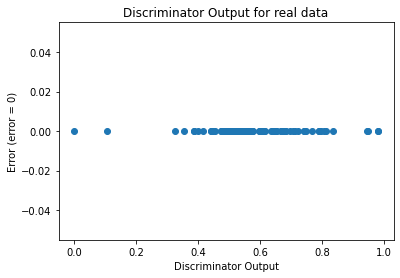

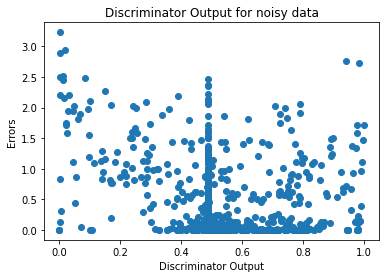

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 45


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.09901436891612653


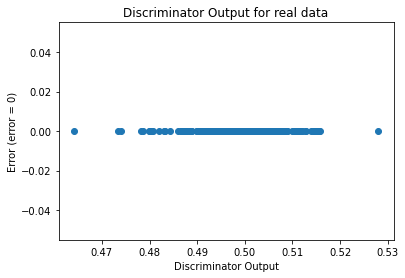

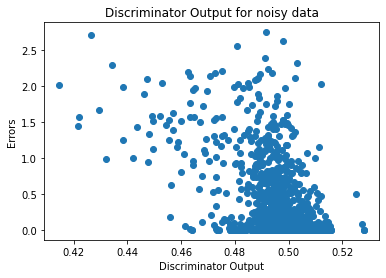

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01500347899876363


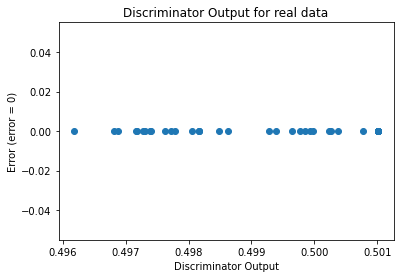

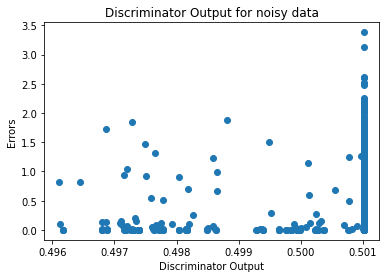

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0028]], requires_grad=True)
